# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [55]:
#ваш код
import pandas as pd

df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [56]:
#ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [57]:
#ваш код
X = df.drop(columns=['sales']).to_numpy()
y = df['sales'].to_numpy()

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [58]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [69]:
X_norm = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [70]:
#ваш код
w = np.zeros(X_norm.shape[1])
n_iter = 1000

for iteration in range(n_iter):
    r = y - X_norm.dot(w)
    for j in range(len(w)):
        r = r + X_norm[:, j] * w[j]
        w[j] = X_norm[:, j].dot(r)
        r = r - X_norm[:, j] * w[j]
w        
        

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [17]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [76]:
#ваш код
X_raw = df.drop(columns=['sales'])
X = (X_raw - np.mean(X_raw, axis=0)) / np.std(X_raw, axis=0)

**Добавим единичный столбец**

In [77]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [91]:
#ваш код
def mse_error(y: np.ndarray, y_pred: np.ndarray) -> float:
    mse = np.mean((y-y_pred)**2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [82]:
#ваш код
y_pred = np.full(
  shape=y.shape,
  fill_value=np.mean(y)
)
print("MSE Error для наивного прогноза:", mse_error(y, y_pred))

MSE Error для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [90]:
#ваш код
def lin_pred(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    y_pred = X.dot(w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [89]:
#ваш код
def stoch_grad_step(X: np.ndarray, y: np.ndarray, w: np.ndarray, train_ind: int, eta: float) -> np.ndarray:
    grad = 2 * X[train_ind] * (X[train_ind] @ w - y[train_ind]) 
    return w - eta * grad

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [101]:
# ваш код
def stochastic_gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, eta: float, n_iter: int, distance: float) -> tuple[np.ndarray, list]:
    curr_distance = float("inf")
    errors = []
    i = 0
    while curr_distance > distance or i < n_iter:
        index = np.random.randint(0, X.shape[0])
        error = mse_error(y, X @ w)
        errors.append(error)
        step = stoch_grad_step(X, y, w, index, eta)
        curr_distance = np.linalg.norm(w-step)
        w = step
        i += 1
    return w, errors
    

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [104]:
n_iter = 100000
w = np.zeros(X.shape[1])
eta = 1e-5
distance = 1e-1

w, errors = stochastic_gradient_descent(X, y, w, eta, n_iter, distance)

**Постройте график зависимости ошибки от номера итерации**

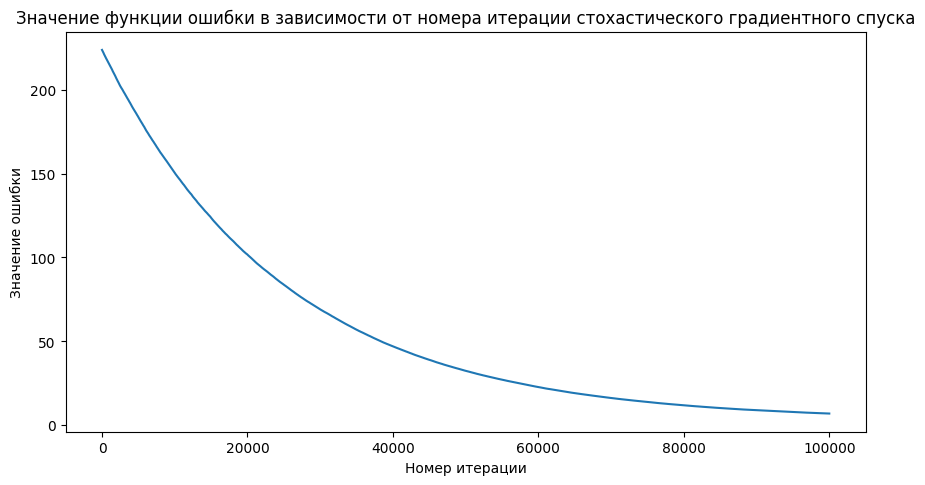

In [112]:
# ваш код
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(np.arange(n_iter), errors)
axes.set_title(
    f"Значение функции ошибки в зависимости от номера итерации стохастического градиентного спуска"
)
axes.set_xlabel("Номер итерации")
axes.set_ylabel("Значение ошибки");

**Выведите вектор весов, к которому сошелся метод.**

In [113]:
# ваш код
w

array([12.12787311,  3.41705774,  2.33744385,  0.33406906])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [114]:
# ваш код
errors[-1]

6.849779859399997

### Бонусное задание